In [1]:
!pip install googledrivedownloader
from google_drive_downloader import GoogleDriveDownloader as gdd
import os,shutil

gdd.download_file_from_google_drive(file_id='1oc3lXgik-9-Ywkvmy0s0asz1241LnDo6',
                                    dest_path='/content/rockpaperscissors.zip',
                                    unzip=True)
shutil.rmtree('__MACOSX')
shutil.rmtree('rockpaperscissors/rps-cv-images')
os.remove('rockpaperscissors.zip')
os.mkdir('validation')

gdd.download_file_from_google_drive(file_id='1z438jtG5tAfhllRh6KgzjyJrxAZQC3O2',
                                    dest_path='/content/Marchel Photo.zip',
                                    unzip=True)
os.remove('Marchel Photo.zip')

Unzipping...Done.
Unzipping...Done.


# New Section

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import zipfile,os
import shutil
train_set = 'rockpaperscissors'
validation_set = 'validation'

train_rock_set = 'rockpaperscissors/rock'
train_paper_set = 'rockpaperscissors/paper'
train_scissors_set = 'rockpaperscissors/scissors'

validation_rock_set = 'validation/rock'
validation_paper_set = 'validation/paper'
validation_scissors_set = 'validation/scissors'

In [4]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.2,
                    )
train_generator = datagen.flow_from_directory(
        train_set,
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical',
        subset='training'
        )

validation_generator = datagen.flow_from_directory(
        train_set,
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical',
        subset='validation'
        )

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [5]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax')                   
])

In [6]:
model.compile(
    loss = 'categorical_crossentropy', 
    optimizer= 'rmsprop', 
    metrics=['accuracy'])

In [7]:
result = model.fit(
            train_generator,
            steps_per_epoch=50,
            epochs=50,
            validation_data=validation_generator,
            validation_steps=3,
            verbose=1)

Epoch 1/50
50/50 [==============================] - 5s 97ms/step - loss: 1.2838 - accuracy: 0.3920 - val_loss: 1.0352 - val_accuracy: 0.4667
Epoch 2/50
50/50 [==============================] - 5s 95ms/step - loss: 0.8434 - accuracy: 0.6340 - val_loss: 0.7014 - val_accuracy: 0.8333
Epoch 3/50
50/50 [==============================] - 5s 95ms/step - loss: 0.4897 - accuracy: 0.8200 - val_loss: 0.5341 - val_accuracy: 0.7667
Epoch 4/50
50/50 [==============================] - 5s 97ms/step - loss: 0.4578 - accuracy: 0.8330 - val_loss: 0.3456 - val_accuracy: 0.9333
Epoch 5/50
50/50 [==============================] - 5s 95ms/step - loss: 0.3036 - accuracy: 0.9000 - val_loss: 0.3770 - val_accuracy: 0.8333
Epoch 6/50
50/50 [==============================] - 5s 93ms/step - loss: 0.3067 - accuracy: 0.9002 - val_loss: 0.1470 - val_accuracy: 0.9333
Epoch 7/50
50/50 [==============================] - 5s 93ms/step - loss: 0.3304 - accuracy: 0.8900 - val_loss: 0.4662 - val_accuracy: 0.8000
Epoch 8/50
50

In [8]:
import matplotlib.pyplot as plt

accuracy = result.history['accuracy']
val_accuracy = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']
epoch = range(len(result.history['accuracy']))

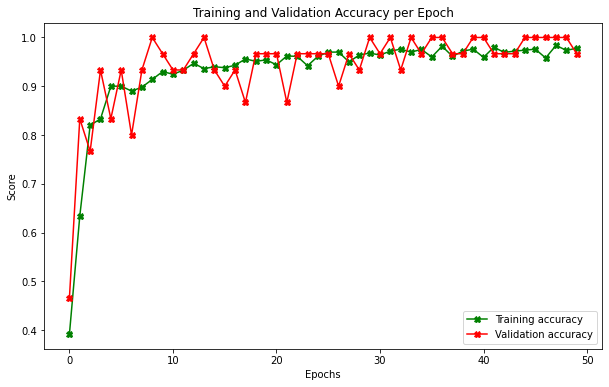

In [9]:
fig, size = plt.subplots(figsize=(10,6))
size.plot(epoch, accuracy, color='green', label='Training accuracy',marker='X')
size.plot(epoch, val_accuracy, color='red', label='Validation accuracy',marker='X')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('Training and Validation Accuracy per Epoch')
plt.legend()
plt.show()

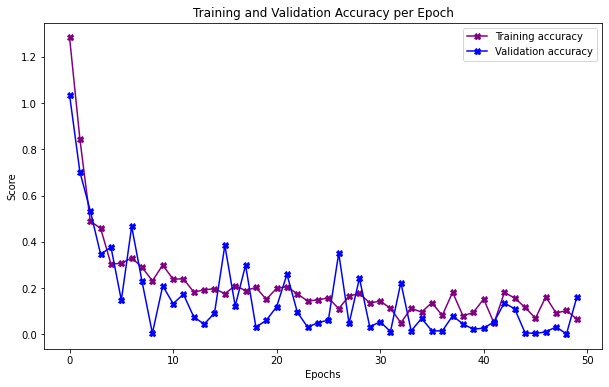

In [10]:
fig, size = plt.subplots(figsize=(10,6))
size.plot(epoch, loss, color='purple', label='Training accuracy',marker='X')
size.plot(epoch, val_loss, color='blue', label='Validation accuracy',marker='X')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('Training and Validation Accuracy per Epoch')
plt.legend()
plt.show()

In [11]:
model_score = model.evaluate(train_generator,steps=25)
print("Model Test Train Loss:",model_score[0])
print("Model Test Train Accuracy:",model_score[1])
model_score = model.evaluate(validation_generator,steps=25)
print("Model Test Validation Loss:",model_score[0])
print("Model Test Validation Accuracy:",model_score[1])

25/25 [==============================] - 2s 78ms/step - loss: 0.0460 - accuracy: 0.9880
Model Test Train Loss: 0.046004071831703186
Model Test Train Accuracy: 0.9879999756813049
25/25 [==============================] - 2s 77ms/step - loss: 0.0406 - accuracy: 0.9880
Model Test Validation Loss: 0.040601957589387894
Model Test Validation Accuracy: 0.9879999756813049


In [12]:
label_map = train_generator.class_indices
print(label_map)

{'paper': 0, 'rock': 1, 'scissors': 2}


Saving 2DQbLQfHlfrcATqi.png to 2DQbLQfHlfrcATqi.png
2DQbLQfHlfrcATqi.png
[0]
paper


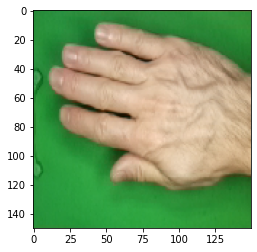

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  resized = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(resized)
  exp_img = np.expand_dims(resized, axis=0)
  y_prob = model.predict(exp_img)
  _cls = y_prob.argmax(axis=-1)
  print(fn)
  print(_cls)
  
  if (_cls==0):
    print('paper')
  elif (_cls==1):
    print('rock')
  elif (_cls==2):
    print('scissors')

In [ ]:
# Contoh gambar yang saya ambil sendiri
# https://drive.google.com/file/d/1z438jtG5tAfhllRh6KgzjyJrxAZQC3O2/view?usp=sharing